# Bitbot

## Setup

### Load config files

In [1]:
!pip install -r ../requirements.txt
import os
import pathlib
import sys
sys.path.append("..")
from src.configuration.bitbot_files import use_config_dir
from src.configuration.bitbot_config import load_config_ini

curdir = pathlib.Path(os.path.abspath('..')).resolve()

files = use_config_dir(curdir)
config = load_config_ini(files)
config.set('display', 'output', 'disk')
config.set('display', 'resolution', '400x300')

files.base_style


Defaulting to user installation because normal site-packages is not writeable


'/workspaces/Bitbot/config/mpl_styles/base.mplstyle'

## MPF plot

### Fetch Data

In [82]:
# fetch candles
import datetime
import ccxt
import numpy as np
exchange = getattr(ccxt, 'coinbase')()

mkts = exchange.loadMarkets()

import matplotlib.dates as mdates
import matplotlib.units as munits

candle_width = '1m'
print(exchange.timeframes)

chart_start = None # (datetime.datetime.now() - datetime.timedelta(days=30)).timestamp() * 1000
exchange_data = exchange.fetchOHLCV('BTC/USD', candle_width, limit=40, since=chart_start)
# convert candles to dataframe
import pandas as pd
df = pd.DataFrame(exchange_data)
df = df.drop([6, 7], axis=1, errors='ignore')
df.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
#df["date"] = df.date.map(lambda s: int(s))
#df["date"] = df.date.map(lambda s: np.datetime64(s,"ms"))
#df["date"] = df.date.map(lambda s: datetime.datetime.fromtimestamp(s // 1000).strftime("%Y/%m/%d, %H:%M:%S"))
#df.set_index(df["date"], inplace=True)
#df.index = df["date"]
                  
#df['date'] = pd.to_datetime(df['date'], unit='ms', utc=True)
#df = df.set_index('date')
#df['index'] = pd.to_datetime(df['date'], unit='s', utc=True)
df.date = pd.DatetimeIndex(df['date'], dtype='datetime64[ms]') # , dtype='datetime64[ms]'
#df.drop('date', axis=1, inplace=True)
df.set_index('date', inplace=True)
df

{'1m': 'ONE_MINUTE', '5m': 'FIVE_MINUTE', '15m': 'FIFTEEN_MINUTE', '30m': 'THIRTY_MINUTE', '1h': 'ONE_HOUR', '2h': 'TWO_HOUR', '6h': 'SIX_HOUR', '1d': 'ONE_DAY'}


,open,high,low,close,volume
date,,,,,
2025-01-25 00:44:00,104611.35,104628.77,104563.61,104574.44,1.649656
2025-01-25 00:45:00,104574.44,104610.88,104565.66,104579.42,1.344758
2025-01-25 00:46:00,104579.43,104579.43,104474.58,104496.30,8.029487
2025-01-25 00:47:00,104490.16,104631.06,104490.14,104622.45,3.222647
2025-01-25 00:48:00,104617.08,104631.06,104491.74,104504.16,0.792498
2025-01-25 00:49:00,104504.16,104535.47,104478.39,104533.14,2.229251
2025-01-25 00:50:00,104532.81,104534.75,104470.77,104491.45,2.686494
2025-01-25 00:51:00,104491.44,104511.38,104465.93,104479.78,0.992058
2025-01-25 00:52:00,104479.78,104490.19,104461.06,104490.18,2.233220


## Try to draw an attractive graph

### ⏲️ select datetime format

In [83]:
# import numpy 

# candle_time_delta = df.index.values[1] - df.index.values[0]
# if(candle_time_delta <= numpy.timedelta64(1,'h')):
#     format = '%H:%M'
# elif(candle_time_delta <= numpy.timedelta64(1,'D')): 
#     format = '%b.%d'
# else:
#     format = '%b'

### 📐 mpf style

In [84]:
import matplotlib.font_manager as font_manager

fonts = font_manager.findSystemFonts(fontpaths=files.resource_folder)
for font_file in fonts:
    font_manager.fontManager.addfont(font_file)

nice_style = {
    "base_mpl_style": "dark_background",
    "marketcolors": {
        "candle": {"up": "green", "down": "red"},  
        "edge": {"up": "green", "down": "red"},  
        "wick": {"up": "green", "down": "red"},  
        "ohlc": {"up": "green", "down": "red"},
        "volume": {"up": "green", "down": "red"},  
        "vcedge": {"up": "green", "down": "red"},  
        "vcdopcod": False,
        "alpha": 1,
    },
    "mavcolors": ("#ad7739", "#a63ab2", "#62b8ba"),
    "facecolor": "white",
    "gridcolor": "None",
    "gridstyle": "--",
    "y_on_right": False,
    "rc": {
        "axes.grid": True,
        "axes.grid.axis": "y",
        "axes.edgecolor": "#474d56",
        "axes.titlecolor": "red",
        "figure.facecolor": "white",
        "figure.titlesize": "x-large",
        "figure.titleweight": "semibold",
        "font.family": "sans-serif",
        "font.sans-serif": "basis33",
        "savefig.pad_inches": "0",
        "savefig.transparent": True,
        "xtick.labelsize":   "11",
        "ytick.labelsize":    "11",
        "axes.spines.top":    "False",
        "axes.spines.right":  "False",
        "axes.spines.bottom":    "True",
        "axes.spines.left":  "True",
        "text.hinting_factor":"1",
        "text.hinting":       "native",
        "text.antialiased":   "False",
        "patch.antialiased":  "False",
        "lines.antialiased":  "False",
    },
}

### 📈 create plot figure

(600, 448)


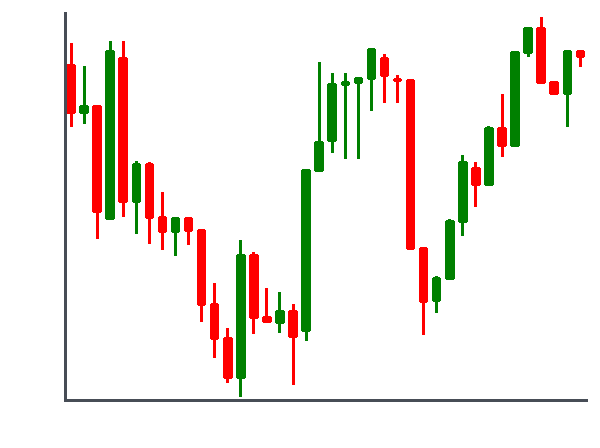

In [85]:
display_size = (600,448)
display_dpi = 130

from matplotlib import ticker
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
from matplotlib.ticker import EngFormatter

fig, ax = mpf.plot(
    df,
    scale_width_adjustment=dict(volume=0.9, candle=0.8, lines=0.05), # sharpen candle lines
    update_width_config=dict(candle_linewidth=0.6), # sharpen candles, also removes curves :  "thickness of candle edge and its wick"
    returnfig=True,
    type='candle',
    show_nontrading=True,
    volume=False,
    style=nice_style,
    tight_layout=True,
    figsize=tuple(dim/display_dpi for dim in display_size),
    xrotation=0,
    tz_localize=False
)

#fig.autofmt_xdate()
matplotlib.use('Agg')

ax[1].xaxis.set( 
    major_locator = mdates.AutoDateLocator(minticks = 2, maxticks = 3)
)
ax[0].yaxis.set( 
    major_formatter = EngFormatter(sep='')
)

for a in ax: 
    a.set_ylabel("")
    a.set_xlabel("")
    #a.margins(0.05, 0.05)
    #a.autoscale(enable=True, axis="x", tight=False)
    #a.autoscale(enable=True, axis="y", tight=False)

#fig.autofmt_xdate()
import io
from PIL import Image
with io.BytesIO() as file_stream:
    fig.savefig(file_stream, dpi=display_dpi)
    chart_image = Image.open(file_stream)
    print(chart_image.size)
    chart_image.show()
plt.close()

## Output

(459, 319)


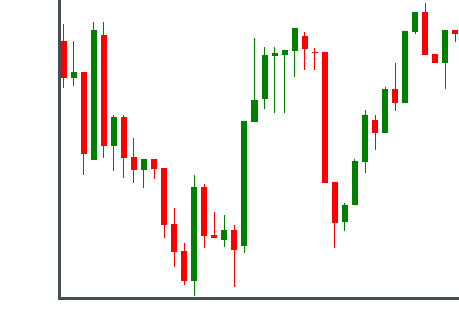

In [86]:
import io
from PIL import Image
with io.BytesIO() as file_stream:
    fig.savefig(file_stream, bbox_inches='tight')
    chart_image = Image.open(file_stream)
    print(chart_image.size)
    chart_image.show()